In [147]:
!pip install tensorflow==2.9.1 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf

print(tf.__version__)

2.10.0


In [6]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# Default Package to mapping
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# Preprocessing Package to structuring and manipulating data
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import pad_sequences
# Modelling package to improve accuracy and score model
from sklearn.metrics import confusion_matrix, f1_score, classification_report
# Report Package to Knowing what's the accuracy of model created
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fikry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fikry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
dataframe = pd.read_csv("data-newspaper.csv")

In [9]:
dataframe

,article_id,article_topic,article_content
0,93205794,Internasional,Kepolisian Inggris tengah memburu pelaku yang...
1,93186698,Ekonomi,Seluruh layanan transaksi di jalan tol akan m...
2,93191463,Teknologi,"\nHari ini, Rabu (23/8), ternyata menjadi har..."
3,93219292,Ekonomi,Saat ini Indonesia hanya memiliki cadangan ba...
4,343106,Hiburan,"Hari ini, Selasa (1/8), pedangdut Ridho Rhoma..."
...,...,...,...
9995,93221319,Bojonegoro,Reporter : Joel JokoblokBojonegoro.com - Har...
9996,93203115,Ekonomi,"Pada akhir tahun ini, Direktur Jenderal (Dirj..."
9997,93230854,Sepak Bola,Ketika pertama kali datang ke Barcelona pada ...
9998,93199312,Sepak Bola,Tim Nasional (Timnas) Indonesia U-19 berhasil...


In [10]:
dataframe.info()

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 22.9.24
    Uninstalling flatbuffers-22.9.24:
      Successfully u

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~-nsorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



In [11]:
count_data = dataframe.groupby('article_topic')[['article_content']].count().sort_values(by='article_content',ascending=False).reset_index()
count_data

,article_topic,article_content
0,Ekonomi,1760
1,Haji,1497
2,Hiburan,1448
3,Sepak Bola,1180
4,Internasional,739
5,Lifestyle,568
6,Teknologi,567
7,Sports,435
8,Bojonegoro,260
9,Kesehatan,195


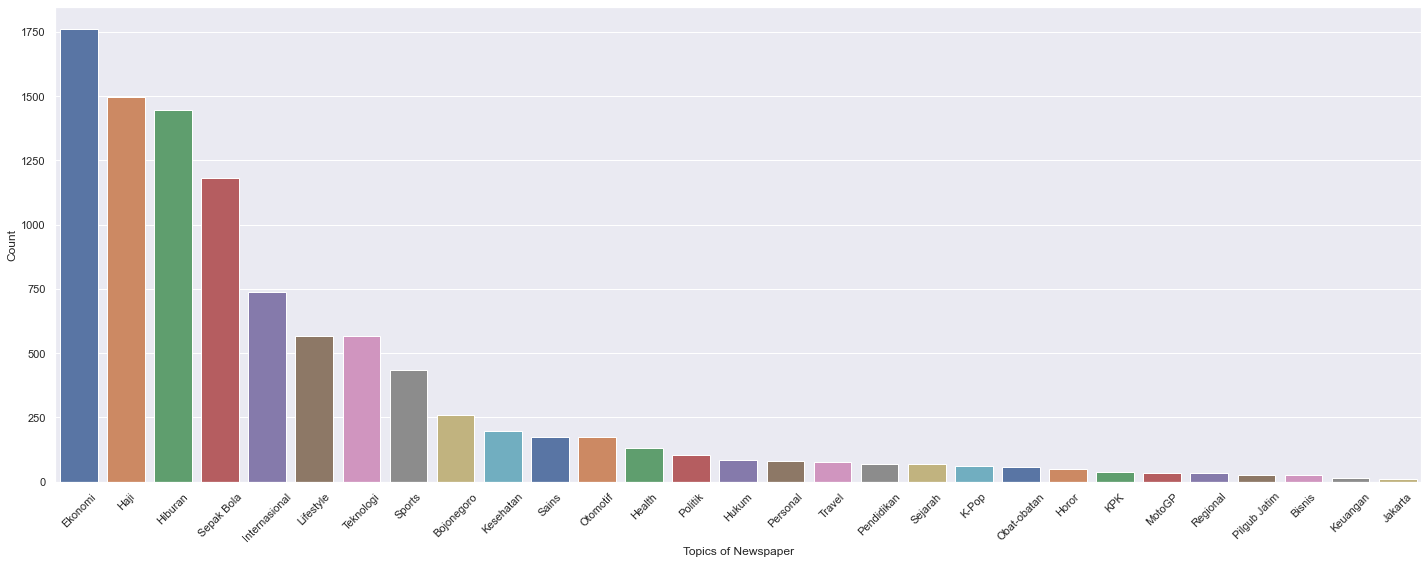

In [12]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=count_data['article_topic'], y=count_data['article_content'], palette="deep", ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('Topics of Newspaper')
plt.xticks(rotation = 45)
plt.tight_layout()

In [13]:
dataframe.isnull().sum()

article_id          0
article_topic       0
article_content    36
dtype: int64

In [14]:
dataframe = dataframe.dropna(how='any')
dataframe.isnull().sum()

article_id         0
article_topic      0
article_content    0
dtype: int64

In [15]:
dataframe['article_content'][0]

' Kepolisian Inggris tengah memburu pelaku yang meledakkan bom di stasiun London. Sedikitnya 22 orang terluka dalam peristiwa yang terjadi pada Jumat pagi yang sibuk (15/9).Menurut asisten komisaris kepolisian Inggris Mark Rowley seperti dikutip The Guardian, ratusan detektif dikerahkan untuk menyelidiki kasus ini. Mereka akan memeriksa semua rekaman CCTV di jaringan kereta bawah tanah London untuk mencari pelakunya.Sebelumnya kepolisian telah menangani kasus ini sebagai aksi terorisme. Penyelidikan juga dilakukan oleh Komando Pemberantasan Terorisme Kepolisian London dan badan keamanan dalam negeri Inggris MI5.Ledakan terjadi di stasiun Parsons Green di salam satu gerbong kereta. Peristiwa ini memicu kepanikan ratusan penumpang yang langsung berhamburan menyelamatkan diri. Sedikitnya 22 orang terluka, namun tidak mengancam nyawa.Menurut kepolisian, bom rakitan itu belum sepenuhnya meledak. Tim forensik akan menyelidiki bom itu, mencari tahu bahan kimia yang digunakan, dan dari mana pe

In [16]:
all_text = dataframe['article_content'].to_numpy()
all_text

array([' Kepolisian Inggris tengah memburu pelaku yang meledakkan bom di stasiun London. Sedikitnya 22 orang terluka dalam peristiwa yang terjadi pada Jumat pagi yang sibuk (15/9).Menurut asisten komisaris kepolisian Inggris Mark Rowley seperti dikutip The Guardian, ratusan detektif dikerahkan untuk menyelidiki kasus ini. Mereka akan memeriksa semua rekaman CCTV di jaringan kereta bawah tanah London untuk mencari pelakunya.Sebelumnya kepolisian telah menangani kasus ini sebagai aksi terorisme. Penyelidikan juga dilakukan oleh Komando Pemberantasan Terorisme Kepolisian London dan badan keamanan dalam negeri Inggris MI5.Ledakan terjadi di stasiun Parsons Green di salam satu gerbong kereta. Peristiwa ini memicu kepanikan ratusan penumpang yang langsung berhamburan menyelamatkan diri. Sedikitnya 22 orang terluka, namun tidak mengancam nyawa.Menurut kepolisian, bom rakitan itu belum sepenuhnya meledak. Tim forensik akan menyelidiki bom itu, mencari tahu bahan kimia yang digunakan, dan dari 

In [ ]:
stop_words = set(stopwords.words('indonesian'))
stop_words

In [18]:
def cleaning(text):
  # Lowering Letters
  text = text.lower()
  # Removing White Space
  text = text.strip()
  # Removing HTML Tags
  text = re.sub('<[^>]*>.,', '', text)
  # Removing Email
  text = re.sub('\5*@\S*\s?', '', text)
  # Removing URL
  text = re.sub('http[s]?\://[A-Za-z0-9]\S+', '', text)
  # removing number
  text = re.sub('#[_]*[^a-zA-Z]+', '', text)
  
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  for token_of_word in word_tokens:
    if token_of_word not in stop_words:
      filtered_sentence.append(token_of_word)
  text = (' '.join(filtered_sentence))
  return text


In [19]:
data_cleaned = np.array([cleaning(text) for text in all_text])
data_cleaned

array(['kepolisian inggris memburu pelaku meledakkan bom stasiun london . 22 orang terluka peristiwa jumat pagi sibuk ( 15/9 ) .menurut asisten komisaris kepolisian inggris mark rowley dikutip the guardian , ratusan detektif dikerahkan menyelidiki . memeriksa rekaman cctv jaringan kereta tanah london mencari pelakunya.sebelumnya kepolisian menangani aksi terorisme . penyelidikan komando pemberantasan terorisme kepolisian london badan keamanan negeri inggris mi5.ledakan stasiun parsons green salam gerbong kereta . peristiwa memicu kepanikan ratusan penumpang langsung berhamburan menyelamatkan . 22 orang terluka , mengancam nyawa.menurut kepolisian , bom rakitan sepenuhnya meledak . tim forensik menyelidiki bom , mencari bahan kimia , pelaku mempelajari pembuatannya.inggris mengalami kali serangan teroris , menewaskan 36 orang . 2005 , 52 orang tewas ledakan bunuh kereta tanah london bus .',
       "layanan transaksi jalan tol sistem nontunai oktober . meningkatkan layanan , kebijakan di

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_cleaned)

In [21]:
all_encoded_texts = tokenizer.texts_to_sequences(data_cleaned)
all_encoded_texts = np.array(all_encoded_texts)
all_encoded_texts

array([list([847, 301, 5549, 383, 15422, 1901, 1303, 1447, 140, 5, 2647, 1118, 178, 317, 2447, 94, 20, 529, 2448, 3134, 847, 301, 4411, 30213, 589, 76, 3904, 1093, 21319, 9125, 6192, 3427, 2608, 6009, 615, 841, 91, 1447, 345, 9528, 1208, 847, 1983, 304, 2685, 2983, 6083, 3713, 2685, 847, 1447, 206, 503, 134, 301, 52950, 3450, 1303, 16874, 3154, 4253, 9126, 841, 1118, 1572, 10035, 1093, 780, 35, 17762, 2572, 140, 5, 2647, 2009, 2529, 529, 847, 1901, 15423, 1847, 5025, 30, 21320, 6192, 1901, 345, 229, 1693, 383, 4292, 10598, 301, 70, 25, 85, 3135, 2701, 1088, 5, 3214, 1230, 5, 899, 3450, 2318, 841, 91, 1447, 285]),
       list([159, 609, 68, 409, 138, 10292, 272, 227, 159, 402, 2122, 609, 1902, 409, 2596, 4667, 537, 3574, 751, 120, 2, 714, 8699, 1837, 5288, 2530, 322, 66, 1202, 264, 80, 583, 9127, 3513, 557, 264, 21321, 1880, 5151, 18810, 1161, 738, 2377, 726, 794, 1161, 738, 4045, 1422, 5, 167, 1, 8699, 521, 714, 3072, 18, 166, 94, 10, 2530, 1202, 264, 559, 80, 583, 124, 27, 89, 32, 3, 

In [22]:
# Checking the length of the first 5 files
for i in range(5):
  print('Length of File', i, ':', len(all_encoded_texts[i]))

Length of File 0 : 110
Length of File 1 : 236
Length of File 2 : 88
Length of File 3 : 214
Length of File 4 : 206


In [23]:
# Ensure that all files are having the exact same length. In this case it's 500 maximum words
all_encoded_texts = pad_sequences(all_encoded_texts, maxlen=500)

**Label Preprocessing**

In [24]:
total_labels = len(dataframe['article_topic'].unique())
print('Total labels : ', total_labels)

Total labels :  29


In [25]:
all_labels = np.array(dataframe['article_topic'])
all_labels = all_labels[:, np.newaxis]

all_labels.shape

(9964, 1)

In [26]:
one_hot_encoder = OneHotEncoder(sparse=False)
all_labels = one_hot_encoder.fit_transform(all_labels)
all_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### **Modelling**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(all_encoded_texts, all_labels, test_size=0.2, random_state=10, stratify=all_labels)

In [28]:
tokenizer.word_index

{"'": 1,
 'indonesia': 2,
 '2017': 3,
 'haji': 4,
 'orang': 5,
 '1': 6,
 'jemaah': 7,
 'pemain': 8,
 '3': 9,
 '8': 10,
 '2': 11,
 'rp': 12,
 'memiliki': 13,
 '10': 14,
 'anak': 15,
 'salah': 16,
 'wafat': 17,
 'jakarta': 18,
 '5': 19,
 '9': 20,
 'usia': 21,
 'negara': 22,
 'gol': 23,
 '4': 24,
 'kali': 25,
 'dunia': 26,
 'agustus': 27,
 'pemerintah': 28,
 'laga': 29,
 'tim': 30,
 'rumah': 31,
 'september': 32,
 'makkah': 33,
 'musim': 34,
 'langsung': 35,
 'kumparan': 36,
 'gangguan': 37,
 'as': 38,
 '6': 39,
 'berhasil': 40,
 'masyarakat': 41,
 'jamaah': 42,
 'nama': 43,
 'ya': 44,
 'kota': 45,
 'jantung': 46,
 '7': 47,
 'air': 48,
 'juta': 49,
 'harga': 50,
 'kloter': 51,
 'tahun': 52,
 '0': 53,
 'darah': 54,
 'saudi': 55,
 'film': 56,
 'menit': 57,
 'com': 58,
 'bola': 59,
 'perusahaan': 60,
 'sumber': 61,
 'masuk': 62,
 'pertandingan': 63,
 'bin': 64,
 'madinah': 65,
 'persen': 66,
 'dana': 67,
 'jalan': 68,
 'penyakit': 69,
 'mengalami': 70,
 '13': 71,
 'hasil': 72,
 'pt': 73,
 'p

In [29]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=500))
model.add(LSTM(100))
model.add(Dense(total_labels, activation='sigmoid'))
optimizer = Adam(lr=0.1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
125/125 [==============================] - ETA: 0s - loss: 2.4925 - accuracy: 0.2784WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001FFE8637310> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, se

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Graphic of Accuracy')
plt.legend()

### Model Evaluation

In [ ]:
predictions = model.predict(X_test)
predictions_evaluate = np.argmax(predictions, axis=1)

In [ ]:
y_test_evaluate = np.argmax(y_test, axis=1)
target_names = [target_name.split('_')[1] for target_name in one_hot_encoder.get_feature_names()]
print(classification_report(y_test_evaluate, predictions_evaluate, target_names=target_names))

print('Total Weighted +1 Score:', f1_score(y_test_evaluate, predictions_evaluate, average='weighted'))

## **Testing**

In [ ]:
string = 'Ronaldo memberikan 3 gol untuk klub Manchester United sehingga seluruh penonton bersorak gembira atas hiburan yang diberikan Ronaldo'

In [ ]:
cleaned_string = cleaning(string)

encoded_string = tokenizer.texts_to_sequences([cleaned_string])

encoded_string = sequence.pad_sequences(encoded_string, maxlen=500)

In [ ]:
string_predict = model.predict(encoded_string)
print(str(one_hot_encoder.inverse_transform(string_predict).item()))

In [80]:
# grader-required-cell

# GRADED FUNCTION: remove_stopwords
# def remove_stopwords(sentence):
"""
Removes a list of stopwords

Args:
    sentence (string): sentence to remove the stopwords from

Returns:
    sentence (string): lowercase sentence without the stopwords
"""
# List of stopwords
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

sentence = "I am about to go to the store and get any snack"
# Sentence converted to lowercase-only
sentence = sentence.lower()

### START CODE HERE
words = sentence.split()
filtered_words = [word for word in words if word not in stopwords]
print(filtered_words)

filtered_words = []
for word in words:
    if word in stopwords:
        filtered_words.append(word)

sentence = " ".join(filtered_words)

print(filtered_words)
# sentence
# ### END CODE HERE
# return sentence

['go', 'store', 'get', 'snack']
['i', 'am', 'about', 'to', 'to', 'the', 'and', 'any']


In [164]:
# grader-required-cell

# GRADED FUNCTION: parse_data_from_file
# def parse_data_from_file(filename):
"""
Extracts sentences and labels from a CSV file

Args:
    filename (string): path to the CSV file

Returns:
    sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
"""
import csv
filename = 'data-newspaper.csv'
sentences = []
labels = []
with open(filename, 'r') as csvfile:
    ### START CODE HERE
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
#         labels.append(row[0])
#         sentences.append(row[1])
#         if row[0] == 93205794:
            print(row[0])
    ### END CODE HERE
# reader

9
9
9
9
3
9
9
9
9
9
9
9
9
9
6
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
5
9
9
9
9
9
9
9
9
9
9
9
4
9
9
9
9
9
9
9
2
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
3
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
7
9
9
9
9
9
9
9
9
9
9
9
1
9
1
9
9
9
9
9
9
9
1
9
9
9
4
9
9
9
9
6
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
1
9
9
9
9
9
9
9
8
9
9
9
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
5
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
6
9
9
9
2
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9


9
9
9
9
9
9
9
9
9
9
9
9
9
9
2
9
9
9
9
9
9
9
1
9
9
9
9
5
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
7
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
8
9
3
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
2
9
9
9
9
1
9
1
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
4
9
9
9
9
9
9
9
9
9
4
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
2
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
6
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
4
9
9
9
9
9
9
9
9
9
8
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9


9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
1
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
1
9
9
6
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
5
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
6
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
4
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
1
9
9
9
9
9
9
9
9
9
9
8
9
9
9
9
1
9
9
9
9
9
9
9
9
9
1
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
3
9
9
9
9
9
9
9
9
1
9
9
6
9
9
9
9
1
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
3
1
6
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
1
9
9
9
9
9
